In [149]:
import cv2
from PIL import Image
import imageio
import imgaug as ia
import numpy as np
from imgaug import parameters as iap
from imgaug import augmenters as iaa
from IPython.display import display  #32
ia.seed(4)
%matplotlib inline

In [150]:
import imgaug as ia
ia.__version__

'0.4.0'

In [151]:
input_path = r"C:\Users\1603585\Documents\Python Scripts\Aishwarya\GAN_pix2pix\pytorch-CycleGAN-and-pix2pix-master\datasets\data_for_gan\train\\"

In [152]:
image=cv2.imread(input_path + '07040001_10.png')
image_pil = Image.fromarray(image)
# image_pil

In [153]:
# set seed
ia.seed(1)

In [154]:
# Example batch of images
images = [image]
# ia.imshow(np.hstack(images))

In [155]:
"""Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second
# image."""
sometimes_crop = lambda aug: iaa.Sometimes(0.9, aug)
sometimes_bg = lambda aug: iaa.Sometimes(0.9, aug)
sometimes_contrast = lambda aug: iaa.Sometimes(0.9, aug)
sometimes_noise = lambda aug: iaa.Sometimes(0.9, aug)
sometimes_blur = lambda aug: iaa.Sometimes(0.9, aug)
sometimes_degrade_quality = lambda aug: iaa.Sometimes(0.9, aug)
sometimes_low_resolution = lambda aug: iaa.Sometimes(0.2, aug)
sometimes_blend = lambda aug: iaa.Sometimes(0.9, aug)

(962, 946, 3)


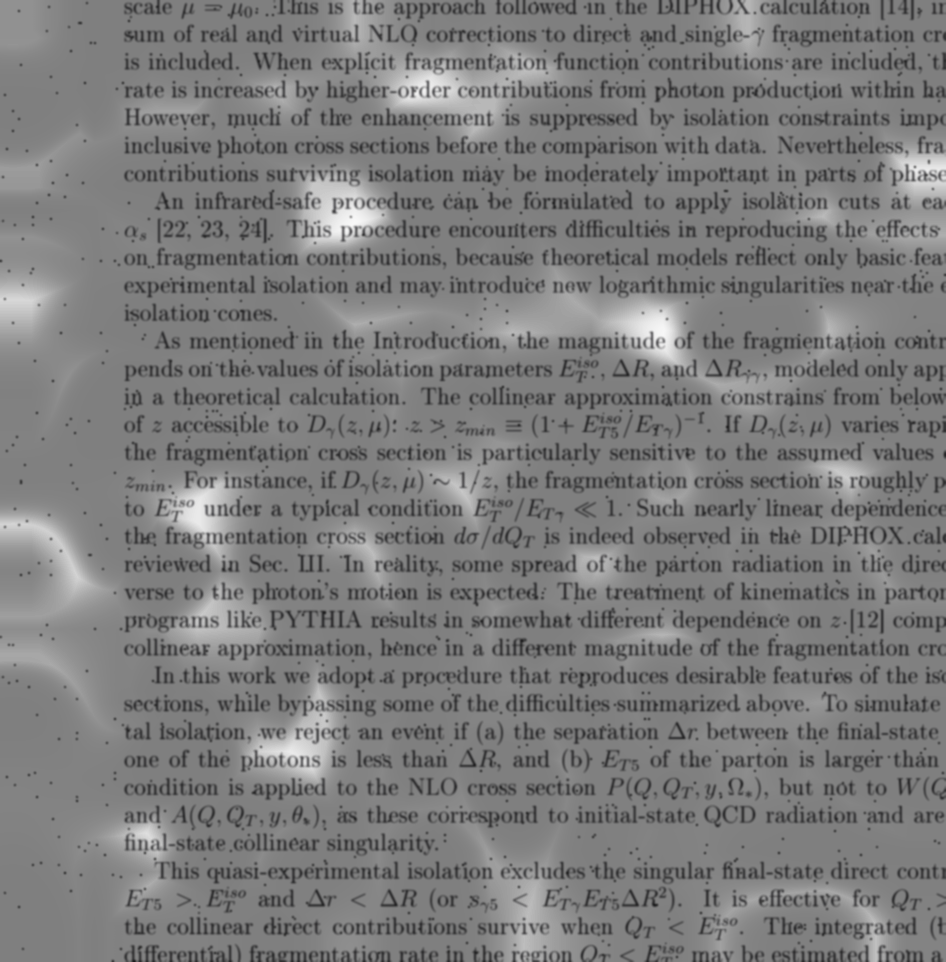

In [180]:
seq = iaa.Sequential(
            [
            # crop some of the images by 0-30% of their height/width
            sometimes_crop(iaa.Crop(percent=(0, 0.3),keep_size=False)),
            # Execute 0 to 4 of the following (less important) augmenters per
                # image. Don't execute all of them, as that would often be way too
                # strong.
#             iaa.SomeOf((0, 4),
#                     [ 
            # change the background color of some of the images chosing any one technique
#             sometimes_bg(iaa.OneOf([
#                         iaa.AddToHueAndSaturation((-60, 60)),
#                         iaa.Multiply((0.6, 1), per_channel=False),
#                         ])),
            #change the contrast of the input images chosing any one technique    
            sometimes_contrast(iaa.OneOf([
                        iaa.LinearContrast((0.5,1.5)),
                        iaa.SigmoidContrast(gain=(3, 5), cutoff=(0.4, 0.6)),
                        iaa.CLAHE(tile_grid_size_px=(3, 21)),
                        iaa.GammaContrast((0.5,1.0))
                        ])),

            #add noise to the input images chosing any one technique 
            sometimes_noise(iaa.OneOf([
                iaa.AdditiveGaussianNoise(scale=(3,8)),
                iaa.CoarseDropout((0.001,0.01), size_percent=0.5),
                iaa.AdditiveLaplaceNoise(scale=(3,10)),
                iaa.CoarsePepper((0.001,0.01), size_percent=(0.5)),
                iaa.AdditivePoissonNoise(lam=(3.0,10.0)),
                iaa.Pepper((0.001,0.01)),
                iaa.Snowflakes(),
                iaa.Dropout(0.01,0.01),
                ])),

            #add blurring techniques to the input image
            sometimes_blur(iaa.OneOf([
                iaa.AverageBlur(k=(3)),
                iaa.GaussianBlur(sigma=(1.0)),
                ])),

            # add techniques to degrade the iamge quality
            sometimes_degrade_quality(iaa.OneOf([
                        iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)),
                        #iaa.MedianBlur(k=(3)),
                        iaa.Sharpen(alpha=(0.5), lightness=(0.75,1.5)),
                        iaa.BlendAlphaSimplexNoise(
                        foreground=iaa.Multiply(iap.Choice([1.5]), per_channel=False)
                        )
                        ])),
                
            # blend some patterns in the background    
            sometimes_blend(iaa.OneOf([
                        iaa.BlendAlpha(
                        factor=(0.6,0.8),
                        foreground=iaa.Sharpen(1.0, lightness=1),
                            
                        background=iaa.CoarseDropout(p=0.1, size_px=np.random.randint(30))),

                        iaa.BlendAlphaFrequencyNoise(exponent=(-4),
                                   foreground=iaa.Multiply(iap.Choice([0.5]), per_channel=False)
                                   ),
                        iaa.BlendAlphaSimplexNoise(
                        foreground=iaa.Multiply(iap.Choice([0.5]), per_channel=True)
                        )
                  ])), 
                
                ])

images_aug = seq(image=images[0])

print(images_aug.shape)
# ia.imshow(images_aug)
image_pil = Image.fromarray(images_aug)
image_pil

##### create data loader for the same

In [9]:
import cv2
import sys
import os
os.environ['TORCH_HOME'] = '/colt/py_stuffs/.cache/'
import torch
from torchvision import transforms
import torchvision
import torch.utils.data
from torch.utils.data import Dataset
import json
# import os
import ast
from PIL import Image
import cv2
import imgaug as ia
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision
from imgaug import parameters as iap
import time
import random
import torchvision.transforms.functional as FT
import matplotlib.pyplot as plt
%matplotlib inline

##### define base path to the orig image

In [11]:
data_folder_path = r"C:\Users\1603585\Documents\Python Scripts\Aishwarya\GAN_pix2pix\pytorch-CycleGAN-and-pix2pix-master\datasets\data_for_gan\train\\"

##### train and test split

In [12]:
img_names = os.listdir(data_folder_path)
img_names = img_names
print(len(img_names))
np.random.seed(50)
np.random.shuffle(img_names)
test_split = .048
valid_split = .2
total_length = len(img_names)
test_length = int(total_length * test_split)
valid_length = int((total_length-test_length) * test_split)
train_length = int(total_length - test_length - valid_length)
print("total_length: {} test_length: {} valid_length: {} train_length: {}".format(total_length,test_length,valid_length,train_length))
from imgaug import augmenters as iaa
ia.seed(4)
%matplotlib inline

2858
total_length: 2858 test_length: 137 valid_length: 130 train_length: 2591


In [13]:
test_image_list = img_names[:test_length]
print("test_image_list:",len(test_image_list))
valid_image_list = img_names[test_length:test_length + valid_length]
print("valid_image_list:",len(valid_image_list))
train_image_list = img_names[test_length + valid_length:]
print("train_image_list:",len(train_image_list))

test_image_list: 137
valid_image_list: 130
train_image_list: 2591


In [14]:
f = open("train_image_list.txt","w")
f.write(str(list(train_image_list)))
f.close()

##### define the data loader

In [15]:
batch_size = 2
workers = 0

In [246]:
class custom_dataloader(Dataset):
    def __init__(self,data_folder,train_image_list):
        self.data_folder=data_folder
        self.filenames=[img for img in os.listdir(self.data_folder) if img in train_image_list]
        """Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
        # e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second
        # image."""
        sometimes_crop = lambda aug: iaa.Sometimes(0.3, aug)
        sometimes_bg = lambda aug: iaa.Sometimes(0.3, aug)
        sometimes_contrast = lambda aug: iaa.Sometimes(0.3, aug)
        sometimes_noise = lambda aug: iaa.Sometimes(0.6, aug)
        sometimes_blur = lambda aug: iaa.Sometimes(0.6, aug)
        sometimes_degrade_quality = lambda aug: iaa.Sometimes(0.9, aug)
        sometimes_blend = lambda aug: iaa.Sometimes(0.2, aug)

        """Define our sequence of augmentation steps that will be applied to every image.""" 
        self.seq = iaa.Sequential(
            [
            # crop some of the images by 0-30% of their height/width
            #sometimes_crop(iaa.Crop(percent=(0, 0.3),keep_size=False)),
            # Execute 0 to 4 of the following (less important) augmenters per
                # image. Don't execute all of them, as that would often be way too
                # strong.
#             iaa.SomeOf((0, 4),
#                     [ 
            # change the background color of some of the images chosing any one technique
#             sometimes_bg(iaa.OneOf([
#                         iaa.AddToHueAndSaturation((-60, 60)),
#                         iaa.Multiply((0.6, 1), per_channel=False),
#                         ])),
            #change the contrast of the input images chosing any one technique    
            sometimes_contrast(iaa.OneOf([
                        iaa.LinearContrast((0.5,1.5)),
                        iaa.SigmoidContrast(gain=(3, 5), cutoff=(0.4, 0.6)),
                        iaa.CLAHE(tile_grid_size_px=(3, 21)),
                        iaa.GammaContrast((0.5,1.0))
                        ])),

            #add noise to the input images chosing any one technique 
            sometimes_noise(iaa.OneOf([
                iaa.AdditiveGaussianNoise(scale=(3,8)),
                iaa.CoarseDropout((0.001,0.01), size_percent=0.5),
                iaa.AdditiveLaplaceNoise(scale=(3,10)),
                iaa.CoarsePepper((0.001,0.01), size_percent=(0.5)),
                iaa.AdditivePoissonNoise(lam=(3.0,10.0)),
                iaa.Pepper((0.001,0.01)),
                iaa.Snowflakes(),
                iaa.Dropout(0.01,0.01),
                ])),

            #add blurring techniques to the input image
            sometimes_blur(iaa.OneOf([
                iaa.AverageBlur(k=(3)),
                iaa.GaussianBlur(sigma=(1.0)),
                ])),

            # add techniques to degrade the iamge quality
            sometimes_degrade_quality(iaa.OneOf([
                        iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)),
                        #iaa.MedianBlur(k=(3)),
                        iaa.Sharpen(alpha=(0.5), lightness=(0.75,1.5)),
                        iaa.BlendAlphaSimplexNoise(
                        foreground=iaa.Multiply(iap.Choice([1.5]), per_channel=False)
                        )
                        ])),
                
            # blend some patterns in the background    
            sometimes_blend(iaa.OneOf([
                        iaa.BlendAlpha(
                        factor=(0.6,0.8),
                        foreground=iaa.Sharpen(1.0, lightness=1),
                            
                        background=iaa.CoarseDropout(p=0.1, size_px=np.random.randint(30))),

                        iaa.BlendAlphaFrequencyNoise(exponent=(-4),
                                   foreground=iaa.Multiply(iap.Choice([0.5]), per_channel=False)
                                   ),
                        iaa.BlendAlphaSimplexNoise(
                        foreground=iaa.Multiply(iap.Choice([0.5]), per_channel=True)
                        )
                  ])), 
                
                ])

    def __getitem__(self, i):
        image_orig = cv2.imread(self.data_folder+self.filenames[i])[:, :, ::-1]
        print(self.filenames[i])

        image = cv2.resize(image_orig.copy(), dsize=(1224, 1584), interpolation=cv2.INTER_CUBIC)
        print(image.shape) 
        images_aug = self.seq(image=image)
        images_aug_tensor = FT.to_tensor(images_aug)
        return images_aug_tensor,self.filenames[i]
        
    def __len__(self):
        return len(self.filenames)

In [247]:
train_dataset = custom_dataloader(data_folder_path,train_image_list)
train_data_loader = DataLoader(train_dataset, batch_size=1, shuffle=True,num_workers = workers,pin_memory=False)
print(f'Train dataset has {len(train_data_loader)} batches of size {batch_size}')
len(train_image_list)

Train dataset has 2591 batches of size 2


2591

##### check augmentations on the images

07040094_4.png
(1584, 1224, 3)


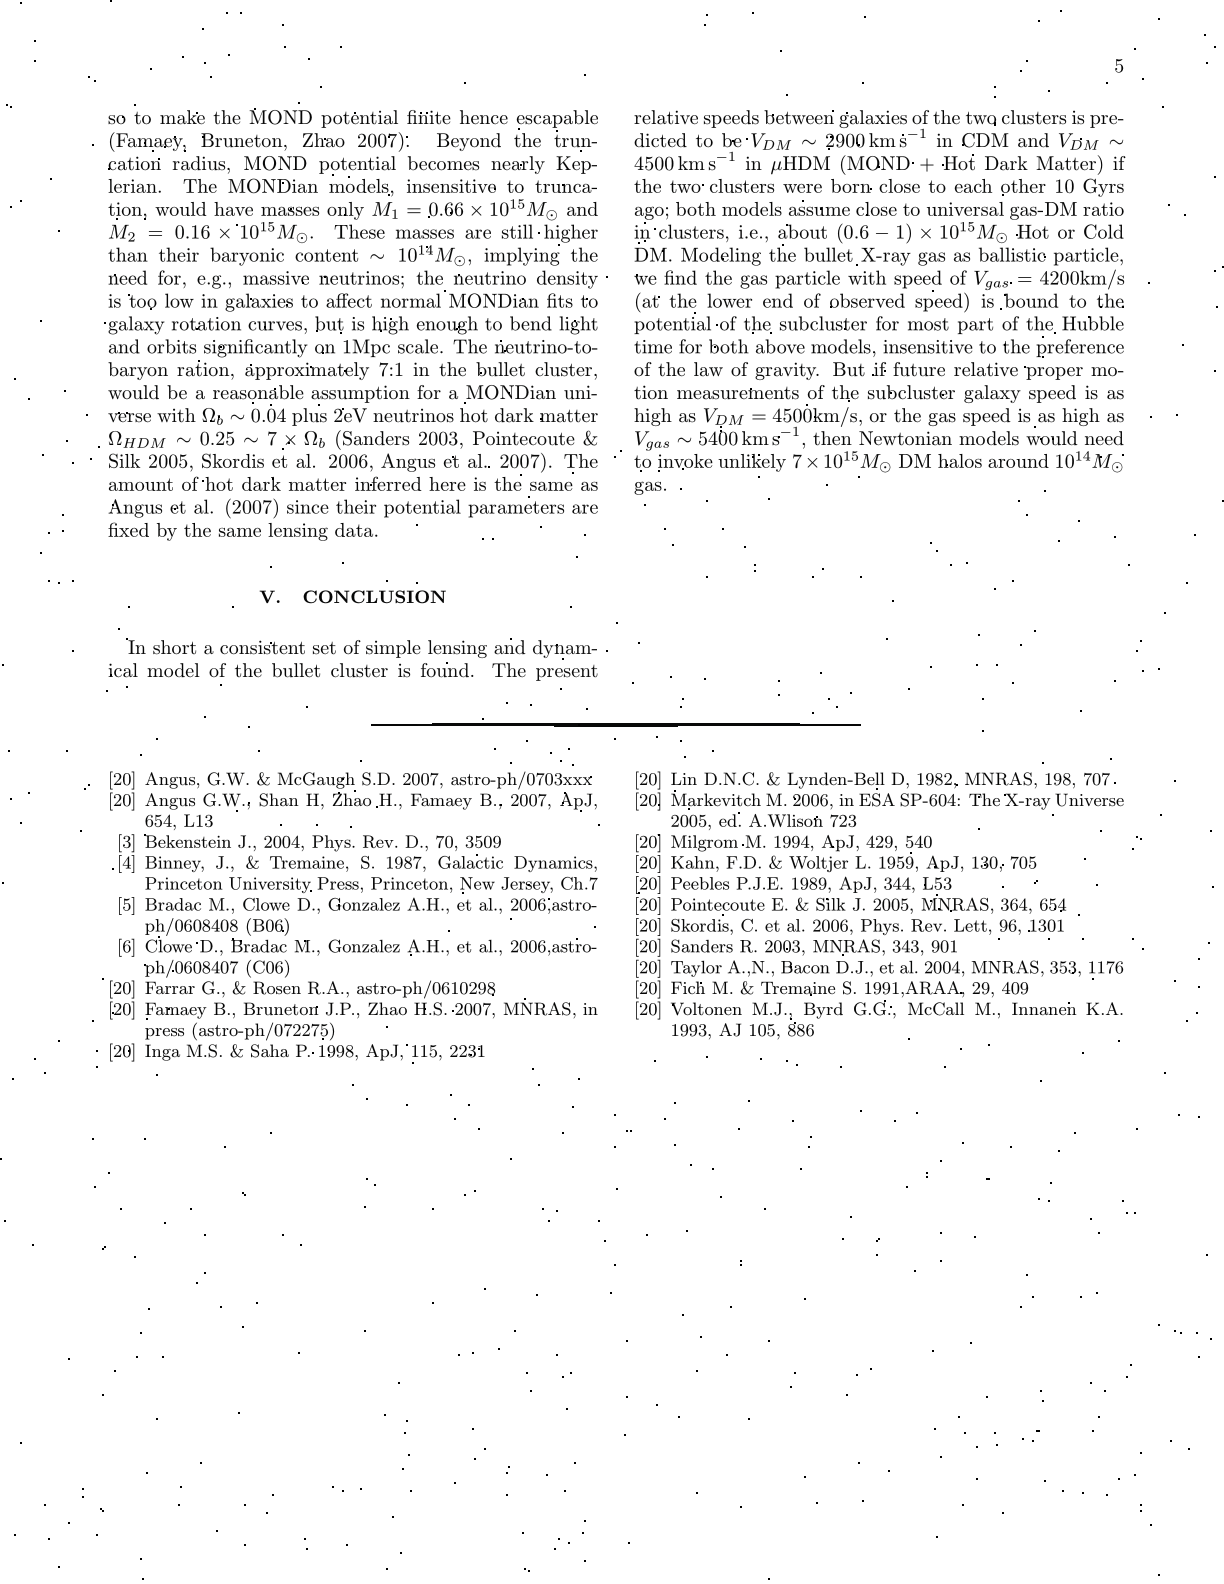

In [273]:
for i, (images,filename) in enumerate(train_data_loader):
#     print(images.size())
    trans = transforms.ToPILImage()
    for j,image in enumerate(images):
        display(trans(image))
        break
    break

In [ ]:
image = cv2.imread(data_folder_path+ filename[0])[:, :, ::-1]
image_pil = Image.fromarray(image)
image_pil

In [ ]:
# img_list = []
# for i, (images,nottensor) in enumerate(train_data_loader):
#     for image in nottensor:
#         img_list.append(image)
#     break
        
# ia.imshow(np.hstack(img_list))

In [245]:
np.random.rand(1)

array([0.66913866])